### Instructions: 
- You can use our HWs, Labs, their solutions, our textbook, lecture notes, or any online source to do these problems.
- Common Piazza threads will be in radio silence during this exam. Do not post or share any codes in the piazza. 
- If you are not clear about the question, send me a private question in the piazza.
- Collaboration of any kind among students is strictly prohibited in this test. Failure to comply with all directions will subject you to disciplinary action.

In [3]:
# Useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
import statsmodels.api as sm

In [4]:
#Data
college = pd.read_csv('College.csv')

Data Details: https://lse-me314.github.io/solutions/ME314_assignment1_solution.html

In [5]:
# Linear Regression Packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
# Classification Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Clustering Package
from sklearn.cluster import KMeans

### Problem 1 [25]
Read the details on the uploaded college data above. Change the name of the first column from 'Unnamed: 0' to 'Name'. We will use the graduation rate 'Grad.Rate' as the dependent variable. Find 8 most important numerical variables ( by using a method of your choice) that are important for the predicition of the graduation rate. Filter the original data with these 8 variables and the 'Grad.Rate'. Find the colored correlation matrix and a pairplot of these 9 variables.

In [8]:
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [9]:
college.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)

In [10]:
college.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [11]:
y = college['Grad.Rate']
x = college[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)

In [12]:
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     40.26
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           5.34e-90
Time:                        23:20:01   Log-Likelihood:                -3073.0
No. Observations:                 777   AIC:                             6180.
Df Residuals:                     760   BIC:                             6259.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.0418      4.589      8.072      0.000      28.033      46.051
Apps            0.0012      0.000      2.710      0.007       0.000       0.002
Accept         -0.0006      0.001     -0.644      0.520      -0.002       0.001
Enroll          0.0021      0.002      0.923      0.356      -0.002       0.007
Top10perc       0.0626      0.072      0.872      0.384      -0.078       0.204
Top25perc       0.1352      0.055      2.454      0.014       0.027       0.243
F.Undergrad    -0.0006      0.000     -1.438      0.151      -0.001       0.000
P.Undergrad    -0.0015      0.000     -3.901      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.307      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.485      0.001       0.001       0.003
Books          -0.0020      0.003     -0.694      0.488      -0.008       0.004
Personal       -0.0017      0.001     -2.167      0.031      -0.003      -0.000
PhD             0.0740      0.057      1.309      0.191      -0.037       0.185
Terminal       -0.0887      0.062     -1.430      0.153      -0.211       0.033
S.F.Ratio       0.0262      0.158      0.166      0.868      -0.283       0.336
perc.alumni     0.2899      0.049      5.919      0.000       0.194       0.386
Expend         -0.0005      0.000     -3.098      0.002      -0.001      -0.000
==============================================================================
Omnibus:                       38.533   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.624
Skew:                           0.200   Prob(JB):                     8.56e-23
Kurtosis:                       4.726   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y = college['Grad.Rate']
x = college[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     42.99
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           8.11e-91
Time:                        23:20:02   Log-Likelihood:                -3073.0
No. Observations:                 777   AIC:                             6178.
Df Residuals:                     761   BIC:                             6253.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.5223      3.560     10.540      0.000      30.534      44.511
Apps            0.0012      0.000      2.729      0.007       0.000       0.002
Accept         -0.0006      0.001     -0.652      0.515      -0.002       0.001
Enroll          0.0021      0.002      0.923      0.356      -0.002       0.007
Top10perc       0.0623      0.072      0.869      0.385      -0.078       0.203
Top25perc       0.1351      0.055      2.454      0.014       0.027       0.243
F.Undergrad    -0.0006      0.000     -1.431      0.153      -0.001       0.000
P.Undergrad    -0.0015      0.000     -3.904      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.332      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.485      0.001       0.001       0.003
Books          -0.0020      0.003     -0.691      0.489      -0.008       0.004
Personal       -0.0017      0.001     -2.187      0.029      -0.003      -0.000
PhD             0.0747      0.056      1.328      0.185      -0.036       0.185
Terminal       -0.0888      0.062     -1.432      0.153      -0.210       0.033
perc.alumni     0.2893      0.049      5.929      0.000       0.193       0.385
Expend         -0.0005      0.000     -3.396      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       38.605   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.039
Skew:                           0.200   Prob(JB):                     6.96e-23
Kurtosis:                       4.730   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y = college['Grad.Rate']
x = college[['Apps', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     46.07
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.44e-91
Time:                        23:20:03   Log-Likelihood:                -3073.3
No. Observations:                 777   AIC:                             6177.
Df Residuals:                     762   BIC:                             6246.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.6983      3.549     10.624      0.000      30.732      44.664
Apps            0.0010      0.000      3.808      0.000       0.000       0.001
Enroll          0.0015      0.002      0.710      0.478      -0.003       0.006
Top10perc       0.0777      0.068      1.149      0.251      -0.055       0.211
Top25perc       0.1299      0.054      2.386      0.017       0.023       0.237
F.Undergrad    -0.0006      0.000     -1.399      0.162      -0.001       0.000
P.Undergrad    -0.0015      0.000     -3.868      0.000      -0.002      -0.001
Outstate        0.0011      0.000      5.358      0.000       0.001       0.002
Room.Board      0.0021      0.001      3.493      0.001       0.001       0.003
Books          -0.0020      0.003     -0.697      0.486      -0.008       0.004
Personal       -0.0017      0.001     -2.160      0.031      -0.003      -0.000
PhD             0.0726      0.056      1.293      0.196      -0.038       0.183
Terminal       -0.0888      0.062     -1.433      0.152      -0.210       0.033
perc.alumni     0.2922      0.049      6.017      0.000       0.197       0.388
Expend         -0.0005      0.000     -3.335      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       37.714   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.847
Skew:                           0.204   Prob(JB):                     9.33e-22
Kurtosis:                       4.681   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y = college['Grad.Rate']
x = college[['Apps', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     49.61
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.54e-92
Time:                        23:20:03   Log-Likelihood:                -3073.5
No. Observations:                 777   AIC:                             6175.
Df Residuals:                     763   BIC:                             6240.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.9356      3.374     10.946      0.000      30.312      43.560
Apps            0.0010      0.000      3.806      0.000       0.000       0.001
Enroll          0.0015      0.002      0.707      0.480      -0.003       0.006
Top10perc       0.0759      0.068      1.123      0.262      -0.057       0.209
Top25perc       0.1290      0.054      2.371      0.018       0.022       0.236
F.Undergrad    -0.0006      0.000     -1.400      0.162      -0.001       0.000
P.Undergrad    -0.0015      0.000     -3.875      0.000      -0.002      -0.001
Outstate        0.0011      0.000      5.387      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.437      0.001       0.001       0.003
Personal       -0.0017      0.001     -2.313      0.021      -0.003      -0.000
PhD             0.0787      0.055      1.417      0.157      -0.030       0.188
Terminal       -0.0940      0.062     -1.528      0.127      -0.215       0.027
perc.alumni     0.2939      0.048      6.061      0.000       0.199       0.389
Expend         -0.0005      0.000     -3.362      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       37.444   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.890
Skew:                           0.202   Prob(JB):                     1.51e-21
Kurtosis:                       4.673   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y = college['Grad.Rate']
x = college[['Apps', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     53.73
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           4.34e-93
Time:                        23:20:03   Log-Likelihood:                -3073.8
No. Observations:                 777   AIC:                             6174.
Df Residuals:                     764   BIC:                             6234.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.1672      3.357     11.071      0.000      30.577      43.758
Apps            0.0010      0.000      4.354      0.000       0.001       0.001
Top10perc       0.0764      0.068      1.131      0.258      -0.056       0.209
Top25perc       0.1273      0.054      2.343      0.019       0.021       0.234
F.Undergrad    -0.0003      0.000     -1.532      0.126      -0.001    8.88e-05
P.Undergrad    -0.0015      0.000     -3.971      0.000      -0.002      -0.001
Outstate        0.0011      0.000      5.453      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.388      0.001       0.001       0.003
Personal       -0.0018      0.001     -2.323      0.020      -0.003      -0.000
PhD             0.0797      0.055      1.437      0.151      -0.029       0.189
Terminal       -0.0953      0.061     -1.551      0.121      -0.216       0.025
perc.alumni     0.2964      0.048      6.130      0.000       0.201       0.391
Expend         -0.0005      0.000     -3.378      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       36.986   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.702
Skew:                           0.218   Prob(JB):                     2.02e-20
Kurtosis:                       4.616   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y = college['Grad.Rate']
x = college[['Apps', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     58.48
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.04e-93
Time:                        23:20:03   Log-Likelihood:                -3074.4
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     765   BIC:                             6229.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.9599      3.184     11.295      0.000      29.710      42.210
Apps            0.0010      0.000      4.462      0.000       0.001       0.002
Top25perc       0.1768      0.032      5.474      0.000       0.113       0.240
F.Undergrad    -0.0003      0.000     -1.567      0.118      -0.001    8.16e-05
P.Undergrad    -0.0016      0.000     -4.092      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.504      0.000       0.001       0.002
Room.Board      0.0019      0.001      3.337      0.001       0.001       0.003
Personal       -0.0017      0.001     -2.292      0.022      -0.003      -0.000
PhD             0.0868      0.055      1.575      0.116      -0.021       0.195
Terminal       -0.1034      0.061     -1.694      0.091      -0.223       0.016
perc.alumni     0.3002      0.048      6.223      0.000       0.205       0.395
Expend         -0.0004      0.000     -3.188      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       36.949   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.318
Skew:                           0.204   Prob(JB):                     5.45e-21
Kurtosis:                       4.648   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
y = college['Grad.Rate']
x = college[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     63.96
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           4.23e-94
Time:                        23:20:03   Log-Likelihood:                -3075.7
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     766   BIC:                             6225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.8181      3.185     11.244      0.000      29.565      42.071
Apps            0.0008      0.000      5.099      0.000       0.000       0.001
Top25perc       0.1732      0.032      5.370      0.000       0.110       0.236
P.Undergrad    -0.0018      0.000     -4.968      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.826      0.000       0.001       0.002
Room.Board      0.0021      0.001      3.582      0.000       0.001       0.003
Personal       -0.0019      0.001     -2.508      0.012      -0.003      -0.000
PhD             0.0837      0.055      1.519      0.129      -0.024       0.192
Terminal       -0.1126      0.061     -1.852      0.064      -0.232       0.007
perc.alumni     0.3010      0.048      6.235      0.000       0.206       0.396
Expend         -0.0004      0.000     -3.027      0.003      -0.001      -0.000
==============================================================================
Omnibus:                       38.523   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.922
Skew:                           0.223   Prob(JB):                     8.99e-22
Kurtosis:                       4.672   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
y = college['Grad.Rate']
x = college[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'Terminal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     70.69
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.52e-94
Time:                        23:20:03   Log-Likelihood:                -3076.8
No. Observations:                 777   AIC:                             6174.
Df Residuals:                     767   BIC:                             6220.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.7804      3.188     11.223      0.000      29.522      42.039
Apps            0.0008      0.000      5.238      0.000       0.000       0.001
Top25perc       0.1813      0.032      5.697      0.000       0.119       0.244
P.Undergrad    -0.0018      0.000     -4.891      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.873      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.521      0.000       0.001       0.003
Personal       -0.0019      0.001     -2.490      0.013      -0.003      -0.000
Terminal       -0.0428      0.040     -1.074      0.283      -0.121       0.035
perc.alumni     0.3004      0.048      6.216      0.000       0.206       0.395
Expend         -0.0004      0.000     -2.972      0.003      -0.001      -0.000
==============================================================================
Omnibus:                       36.334   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.490
Skew:                           0.203   Prob(JB):                     2.24e-20
Kurtosis:                       4.622   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
y = college['Grad.Rate']
x = college[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     79.37
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.92e-95
Time:                        23:20:03   Log-Likelihood:                -3077.4
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     768   BIC:                             6215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.7177      2.545     13.250      0.000      28.722      38.713
Apps            0.0008      0.000      5.132      0.000       0.000       0.001
Top25perc       0.1714      0.030      5.627      0.000       0.112       0.231
P.Undergrad    -0.0018      0.000     -5.147      0.000      -0.003      -0.001
Outstate        0.0012      0.000      5.801      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.423      0.001       0.001       0.003
Personal       -0.0019      0.001     -2.491      0.013      -0.003      -0.000
perc.alumni     0.2973      0.048      6.162      0.000       0.203       0.392
Expend         -0.0004      0.000     -3.054      0.002      -0.001      -0.000
==============================================================================
Omnibus:                       37.738   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.512
Skew:                           0.236   Prob(JB):                     2.22e-20
Kurtosis:                       4.604   Cond. No.                     9.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
college1 = college[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'perc.alumni', 'Expend', 'Grad.Rate']]

Text(0.5, 1.0, 'Correlation Heatmap')

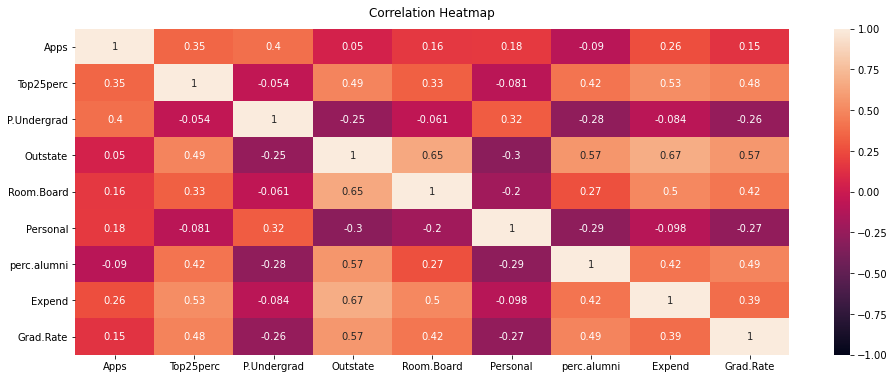

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(college1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

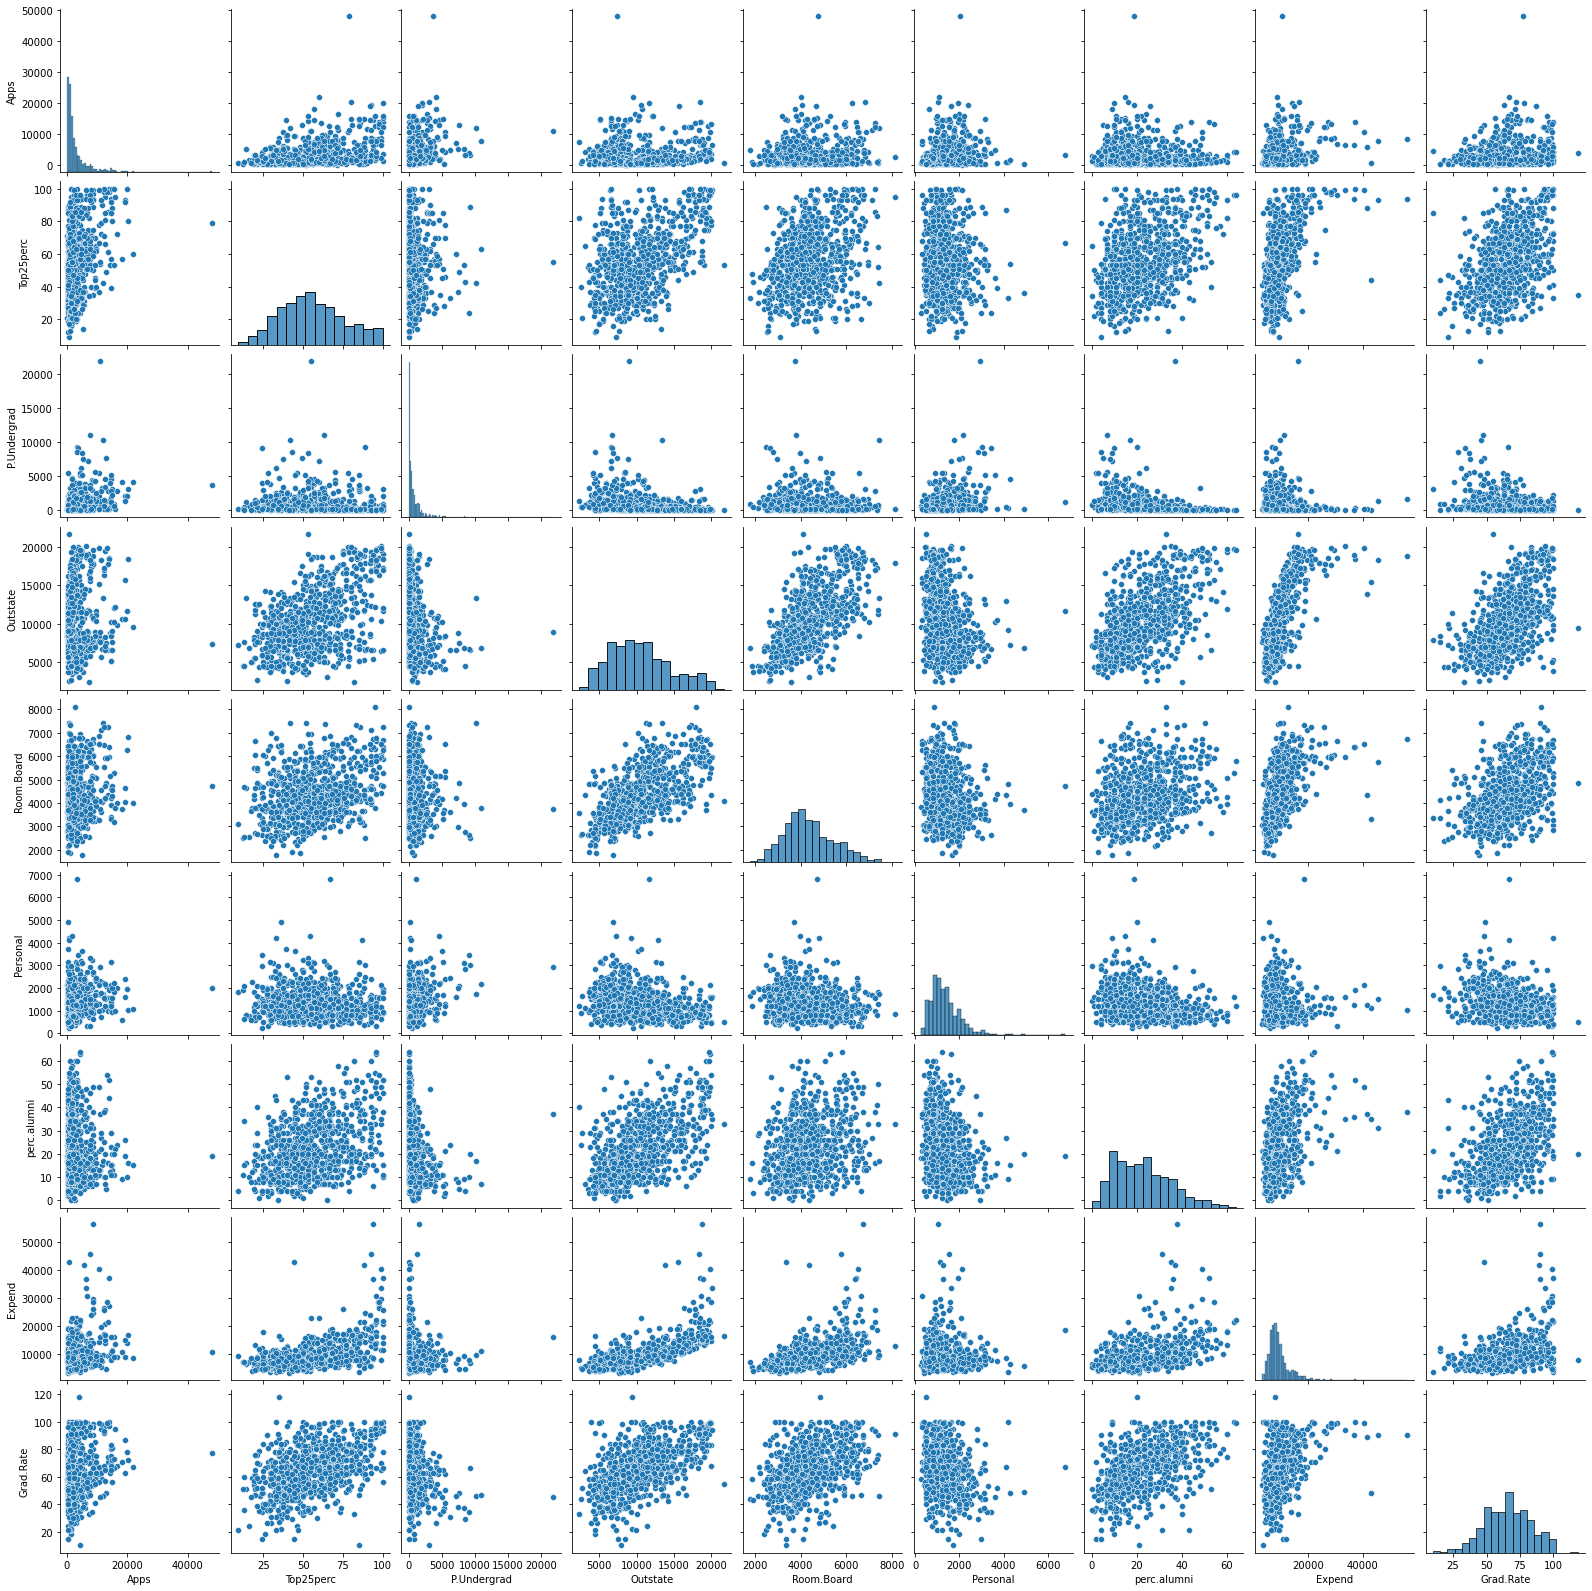

In [23]:
sns.pairplot(college1)

### Problem 2 [25]
Denote 'Grad.Rate' by y and the rest of the 8 variables from problem 1 by x. Divide these data sets into training and testing with the 75/25 rule. Then train 3 multiple linear regression models using 3 linear regression packages imported above. Find MSE for testing and training for all the models and report your best model. Finally, add the categorical variable 'Private' to x, then dummy code x. Retrain the best model you had with this new data and report your MSE for testing and training. Do you see any difference?

LinearRegression,
DecisionTreeRegressor,
RandomForestRegressor

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
y = college1['Grad.Rate']
x = college1[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'perc.alumni', 'Expend']]
x = sm.add_constant(x)

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 17)

In [27]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [28]:
ytrainpred = lr.predict(xtrain)
ytestpred = lr.predict(xtest)

In [29]:
mean_squared_error(ytrain, ytrainpred)

164.70865847911247

In [30]:
mean_squared_error(ytest, ytestpred)

154.2993701814397

In [31]:
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [33]:
ytrainpred2 = dt.predict(xtrain)
ytestpred2 = dt.predict(xtest)

In [34]:
mean_squared_error(ytrain, ytrainpred2)

0.0

In [35]:
mean_squared_error(ytest, ytestpred2)

338.61538461538464

In [36]:
fr = RandomForestRegressor()
fr.fit(xtrain, ytrain)

RandomForestRegressor()

In [38]:
ytrainpred3 = fr.predict(xtrain)
ytestpred3 = fr.predict(xtest)

In [39]:
mean_squared_error(ytrain, ytrainpred3)

25.7615941580756

In [40]:
mean_squared_error(ytest, ytestpred3)

154.27961333333334

The best model in this case is the Linear Regression model.

In [41]:
pd.get_dummies(college['Private']).head(1)

,No,Yes
0,0,1


In [42]:
dummies = pd.get_dummies(college, columns=['Private'])

In [43]:
dummies = pd.get_dummies(college, prefix='', prefix_sep='', 
                            columns=['Private'])
dummies.head(1)

,Name,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,No,Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1


### Problem 3 [25]
Create a new data frame called X from the original college data frame using 8 variables from problem 1 and 'Grad.Rate'. Let Y be the variable 'Private' from the college data frame. Separate X and Y with 80/20 rule into training and testing sets. Train 3 classification models using logistic regression, decision tree, and random forest to classify whether a college is Private or Not. Report training and testing confusion matrices and accuracies for your best model.

In [ ]:
Y = college1['Private']
X = college1[['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Personal', 'perc.alumni', 'Expend', 'Grad.Rate']]
X = sm.add_constant(X)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 17)

In [ ]:
#Logistic Regression

In [ ]:
model = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()

In [ ]:
logit = sm.Logit(y, sm.add_constant(x), method = 'kwargs')
result = logit.fit()
result.summary()

In [ ]:
model = sm.OLS(ytest, sm.add_constant(xtest)).fit()

In [ ]:
logit = sm.Logit(ytest, sm.add_constant(xtest), method = 'kwargs')
result = logit.fit()
result.summary()

In [ ]:
#Decision Tree

In [ ]:
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

In [ ]:
from sklearn import tree
tree = tree.export_text(cart)

In [ ]:
from sklearn import tree
tree.plot_tree(cart)
plt.figure(figsize = (100, 100))
plt.show()

In [ ]:
#Random Forest

In [ ]:
rfmodel = RandomForestClassifier(n_estimators = 50, bootstrap = True)
rfmodel = rfmodel.fit(xtrain, ytrain)

In [ ]:
rand = rfmodel.estimators_[0]
plot_tree(rand)
plt.figure(figsize = (100, 100))
plt.show()

The best model to classify a private college is 

### Problem 4 [25]
Create a new data frame called 'features' from the original college data frame using all the variables except 'Name' And 'Private'. Use 'features' to train a KMeans clustering model with $k=4$. Predict the clusters using 'features' and make a list of these clusters. Now define a new column called "Clusters' and add it to the college data frame.
Find out and display which colleges are in clusters 0,1,2, and 3. Find out and display which cluster does Iowa State University belongs to. What do you think these clusters are telling?

In [44]:
features = college[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

In [45]:
from sklearn.cluster import KMeans as km

In [46]:
kmeans = km(n_clusters = 4)
kmeans.fit(x)
ykmeans = kmeans.predict(x)
ykmeans

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [47]:
college['Clusters'] = ykmeans

In [48]:
college.groupby(by=["Clusters"]).size()

Clusters
0    486
1    210
2     20
3     61
dtype: int64

In [49]:
college.loc[college['Name']=='Iowa State University']

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
277,Iowa State University,No,8427,7424,3441,26,59,18676,1715,7550,3224,640,2055,81,88,19.2,22,8420,65,3


Iowa State University is in the first cluster. I think these clusters mean that certain values are put into a specific group to then be able to categorize them easier.